In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [59]:
import shutil

# Define the input data paths
input_dir = "/kaggle/input/digit-recognizer/"
train_file = "train.csv"
test_file = "test.csv"
sample_submission_file = "sample_submission.csv"

# Define the destination directory in the working directory of the notebook
dest_dir = "./"

# Copy the data files to the working directory
shutil.copyfile(input_dir + train_file, dest_dir + train_file)
shutil.copyfile(input_dir + test_file, dest_dir + test_file)
shutil.copyfile(input_dir + sample_submission_file, dest_dir + sample_submission_file)

# Now you have the data files (train.csv, test.csv, and sample_submission.csv) in your working directory.
# You can use the data as shown in the previous code example to build and train your digit recognition model.


'./sample_submission.csv'

In [60]:
# Load the data from the CSV files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")

In [61]:
# Preprocess the data
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values
X_test = test_data.values

In [62]:
# Normalize the pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [63]:
# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train)

In [64]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Number of samples in X_val:", len(X_val))
print("Number of samples in y_val:", len(y_val))

Number of samples in X_val: 4200
Number of samples in y_val: 4200


In [65]:
# Create the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [66]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.3466 - accuracy: 0.8994 - val_loss: 0.1888 - val_accuracy: 0.9469
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1665 - accuracy: 0.9495 - val_loss: 0.1349 - val_accuracy: 0.9614
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1257 - accuracy: 0.9619 - val_loss: 0.1194 - val_accuracy: 0.9643
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0997 - accuracy: 0.9695 - val_loss: 0.1056 - val_accuracy: 0.9679
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.1001 - val_accuracy: 0.9683
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0728 - accuracy: 0.9765 - val_loss: 0.0916 - val_accuracy: 0.9714
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.0872 - val_accuracy:

In [69]:
# Make predictions on the test data
val_predictions = model.predict(X_val)

132/132 [==============================] - 0s 2ms/step


In [70]:
# Convert the predictions to labels (digits)
predicted_labels = np.argmax(val_predictions, axis=1)
len(predicted_labels)
# Convert the predictions to labels (digits) for test set
predicted_labels = np.argmax(val_predictions, axis=1)
print("Number of samples in X_val:", len(X_val))
print("Number of samples in y_val:", len(y_val))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in predicted_labels:", len(predicted_labels))

Number of samples in X_val: 4200
Number of samples in y_val: 4200
Number of samples in X_test: 28000
Number of samples in predicted_labels: 4200


In [71]:
# Calculate accuracy
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded labels to integers
len(true_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9752380952380952


In [72]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

In [73]:
# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)

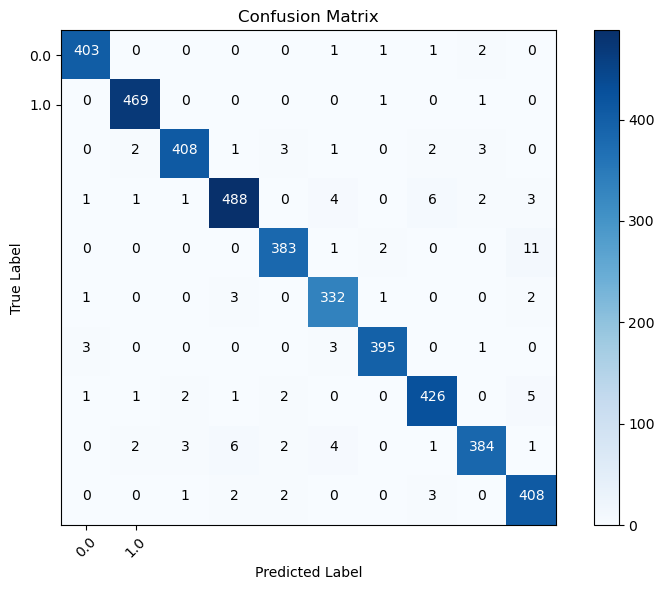

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.99      1.00      0.99       471
           2       0.98      0.97      0.98       420
           3       0.97      0.96      0.97       506
           4       0.98      0.96      0.97       397
           5       0.96      0.98      0.97       339
           6       0.99      0.98      0.99       402
           7       0.97      0.97      0.97       438
           8       0.98      0.95      0.96       403
           9       0.95      0.98      0.96       416

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



In [74]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_train)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations in the cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(report)

In [75]:
# Make predictions on the test data
predictions = model.predict(X_test)

875/875 [==============================] - 2s 2ms/step


In [76]:
# Convert the predictions to labels (digits) for test set
predicted_labels = np.argmax(predictions, axis=1)

In [77]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({"ImageId": range(1, len(predicted_labels) + 1), "Label": predicted_labels})

In [78]:
# Save the submission to a CSV file
submission_df.to_csv("submission.csv", index=False)